In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import ast

from plotly.subplots import make_subplots

In [188]:

# Sample data (replace this with your actual data)
movie_genres_categories = pd.read_csv("../clean_Data/movie_genres_categories.csv")

# Set Seaborn style with a white background
sns.set_style("whitegrid")


# Convert the Seaborn plot to a Plotly Express plot
fig = px.bar(movie_genres_categories, x='Genres', y='mean', title='Revenue for Each Genre',
             labels={'mean': 'Revenue'}, color_discrete_sequence=px.colors.qualitative.Set1)

# Customize the layout
fig.update_layout(xaxis_title='Genre', yaxis_title='Revenue', title_x=0.5)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45, tickmode='array')

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/genre_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/genre_revenue.png', engine='kaleido')
fig.show()


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_89044/139973156.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_89044/139973156.py:22: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




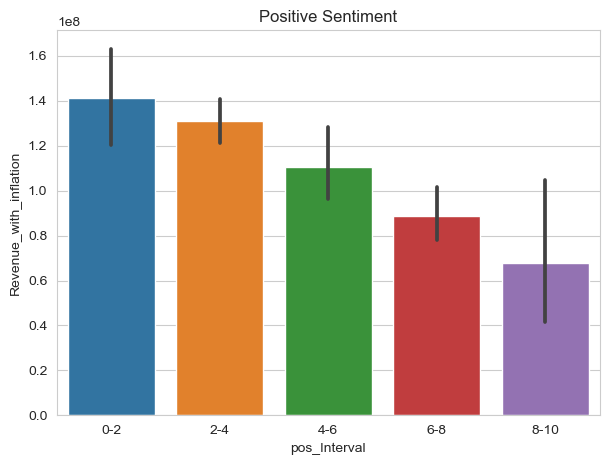

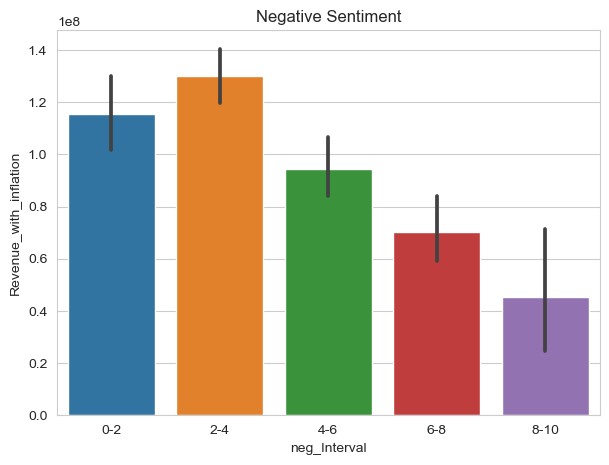

In [189]:
# Sample data (replace this with your actual data)
pos_neg_df = pd.read_csv("../clean_Data/pos_neg_revenue.csv")
columns_of_interest = ['percentage_of_positive_words', 'percentage_of_negative_words', 'percentage_of_neutral_words', 'Revenue_with_inflation']
data_to_plot = pos_neg_df[columns_of_interest]

# Set up a multi-plot grid for Positive Sentiment
fig_pos, ax_pos = plt.subplots(figsize=(7, 5))
pos_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['pos_Interval'] = pd.cut(pos_neg_df['percentage_of_positive_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=pos_order)
sns.barplot(x='pos_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_pos, order=pos_order)
ax_pos.set_title('Positive Sentiment')
df_pos = pos_neg_df.groupby('pos_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_pos_px = px.bar(df_pos, x='pos_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"pos_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)

# Set up a multi-plot grid for Negative Sentiment
fig_neg, ax_neg = plt.subplots(figsize=(7, 5))
neg_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['neg_Interval'] = pd.cut(pos_neg_df['percentage_of_negative_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=neg_order)
sns.barplot(x='neg_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_neg, order=neg_order)
ax_neg.set_title('Negative Sentiment')

df_neg = pos_neg_df.groupby('neg_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_neg_px = px.bar(df_neg, x='neg_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"neg_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)



In [190]:
# Display the Plotly Express bar plot for positive sentiment
fig_pos_px.show()

# Display the Plotly Express bar plot for negative sentiment
# To switch between them interactively, use the code provided in the previous messages.
fig_neg_px.show()

In [191]:
# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_neg_px = px.bar(df_neg, x='neg_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"neg_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_pos_px = px.bar(df_pos, x='pos_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"pos_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)

fig = make_subplots()
# Add a trace for each plot (only one will be visible at a time)
for trace in fig_neg_px.data:
    fig.add_trace(trace)

for trace in fig_pos_px.data:
    trace.visible = False
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_neg_px.data) +
                                       [False] * len(fig_pos_px.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_neg_px.data) +
                                       [True] * len(fig_pos_px.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for negative and positive sentiments",
    title_x=0.5,  # Centers the title
    xaxis_title="Percentage of negative / positive words",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_neg_px.data) + [False]*len(fig_pos_px.data)}],
                label="Negative words",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_neg_px.data) + [True]*len(fig_pos_px.data)}],
                label="Positive words",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/pos_neg_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/pos_neg_revenue.png', engine='kaleido')

In [192]:

# Sample data (replace this with your actual data)
movie_runtime = pd.read_csv("../clean_Data/movie_runtime.csv")

pos_order = ['0-60', '60-120', '120-180', '180-240', '240-1000']

# Create a new column for intervals
movie_runtime['Interval'] = pd.cut(movie_runtime['movie_runtime'], bins=[0, 60, 120, 180, 240, 1000], labels=pos_order)
df = movie_runtime.groupby('Interval')['Revenue_with_inflation'].mean().reset_index()


# Create the bar plot for mean revenue
fig_runtime_mean = px.bar(df, x='Interval', y='Revenue_with_inflation', text_auto='.2s',
                          title='Mean Revenue for Each Runtime Interval',
                          labels={'Revenue_with_inflation': 'Mean Revenue'},
                          category_orders={"Interval": pos_order},
                          color='Interval')

# Create the box plot for log revenue
fig_runtime_box = px.box(movie_runtime, x='Interval', y='log_revenues',
                         title='Boxplot of Revenue for Each Runtime Interval',
                         labels={'log_revenues': 'Log Revenue'},
                         category_orders={"Interval": pos_order},
                         color='Interval')

# Create a figure with subplots
fig = make_subplots()

# Add a trace for each plot (only one will be visible at a time)
for trace in fig_runtime_mean.data:
    fig.add_trace(trace)

for trace in fig_runtime_box.data:
    trace.visible = False
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_runtime_mean.data) +
                                       [False] * len(fig_runtime_box.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_runtime_mean.data) +
                                       [True] * len(fig_runtime_box.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for Each Runtime Interval",
    title_x=0.5,  # Centers the title
    xaxis_title="Interval",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_runtime_mean.data) + [False]*len(fig_runtime_box.data)}],
                label="Mean Revenue",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_runtime_mean.data) + [True]*len(fig_runtime_box.data)}],
                label="Log Revenue",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/runtime_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/runtime_revenue.png', engine='kaleido')


# Introduction - inflation

In [193]:
path = "csv_for_story/movie_with_inflation.csv"
movie_with_inflation = pd.read_csv(path)

The original distribution of the inflated movie box office revenue exhibits a heavy-tailed pattern, with a few movies achieving extremely high revenues. By applying a logarithmic transformation on the x-axis, we "approximate" a normal distribution, making the data more amenable to statistical analyses that assume normality.

Zokomo discovered movie box office revenue data. Inititaly, he noticed that the original distribution of the inflated movie box office revenue exhibits a heavy-tailed pattern, with a few movies achieving extremely high revenues. With a strategic logarithmic transformation on the x-axis, Zokomo reformulated the data, making it resemble a more normalized curve. The aim was to prepare the data for statistical analyses that assumed normality.

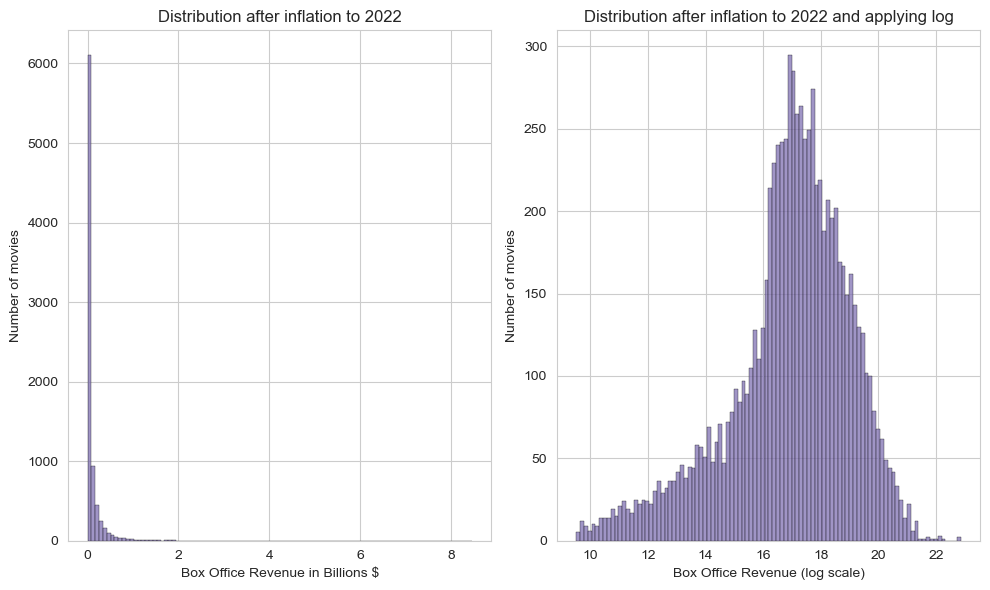

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the original distribution and the distribution after applying log function on the revenue feature
sns.histplot(data=movie_with_inflation, x=movie_with_inflation['Revenue_with_inflation']/1e9, bins=100, color=sns.color_palette("deep")[4], edgecolor='black', ax=ax1)
ax1.set(title='Distribution after inflation to 2022',
        xlabel='Box Office Revenue in Billions $',
        ylabel='Number of movies')

# Distribution after applying log
sns.histplot(data=movie_with_inflation, x='log_revenues', bins=100, edgecolor='black', color=sns.color_palette("deep")[4],ax=ax2)
ax2.set(title='Distribution after inflation to 2022 and applying log',
        xlabel='Box Office Revenue (log scale)',
        ylabel='Number of movies')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [195]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Distribution of revenues', 'Distribution log revenues'])

# Plotting the original distribution
trace1 = go.Histogram(x=movie_with_inflation['Revenue_with_inflation']/1e9, nbinsx=100, marker=dict(color='red'))  # Set color to red
fig.add_trace(trace1, row=1, col=1)

# Plotting the distribution after applying log
trace2 = go.Histogram(x=movie_with_inflation['log_revenues'], nbinsx=100, marker=dict(color='red'))  # Set color to red
fig.add_trace(trace2, row=1, col=2)

# Update layout for the first subplot
fig.update_xaxes(title_text='Box Office Revenue in Billions $', row=1, col=1)
fig.update_yaxes(title_text='Number of movies', row=1, col=1)

# Update layout for the second subplot
fig.update_xaxes(title_text='Box Office Revenue (log scale)', row=1, col=2)
fig.update_yaxes(title_text='Number of movies', row=1, col=2)

# Update overall layout
fig.update_layout(title_text='Box Office Revenue Distribution Analysis', showlegend=False)

# Center the titles
fig.update_layout(title_x=0.5, title_y=0.9, title_xanchor='center', title_yanchor='top')

# Save the interactive plot as an HTML file
fig.write_html("assets/plots/box_office_distribution.html")
fig.show()


Now that he has seen that he should use logs, Zokomo looks at the effect of applying the inflation to the revenues across the years.

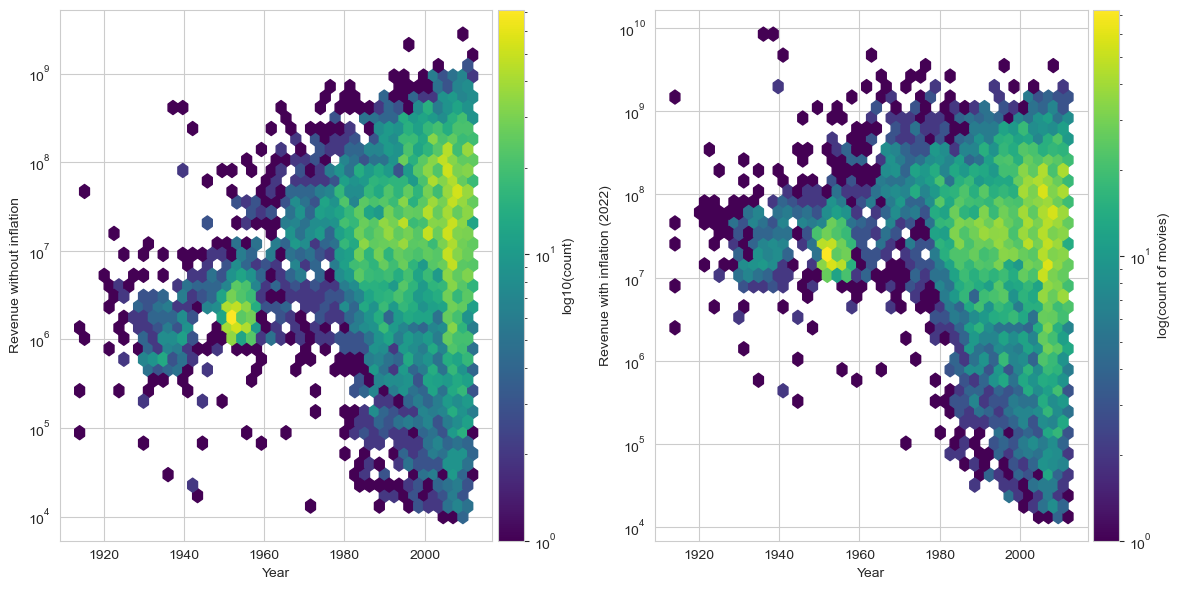

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Revenue without inflation
hb1 = ax1.hexbin(movie_with_inflation['Year'], movie_with_inflation['Movie_box_office_revenue'],
                 gridsize=40, bins='log', yscale='log', cmap='viridis')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue without inflation')
cb1 = fig.colorbar(hb1, ax=ax1, pad=0.01)
cb1.set_label('log10(count)')

# Plot for Revenue with inflation
hb2 = ax2.hexbin(movie_with_inflation['Year'], movie_with_inflation['Revenue_with_inflation'],
                 gridsize=40, bins='log', yscale='log', cmap='viridis')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue with inflation (2022)')
cb2 = fig.colorbar(hb2, ax=ax2, pad=0.01)
cb2.set_label('log(count of movies)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Zokomo notices that Revenues with Inflation show effectively higher revenues for old movies, but, other than that, it is actually resulting in a more similar distribution across the years. He is also saying: "the highest revenues for old movies are now surpassing the other movies. The inflation has huge impact on old movies that it makes them outliers, and even the most recent revenues are inflated since I am considering the inflation with respect tp 2022, to make it more reprensentative. "

# Actors

In [197]:
path = "csv_for_story/top_actors.csv"
top_actors = pd.read_csv(path)

Zokomo indicates that from now on, as in many following feature analysis, he will be averaging log_revenues instead of averaging revenues. He says " this corresponds to computing the geometric mean instead of an arithmetic mean with the objective of gaining statistical stability. The geometric mean tends to be less sensitive to extreme values (outliers) compared to the arithmetic mean. This makes it a more robust measure in situations where there are significant variations in the data, since it represents better the central tendency. In my case, it is useful to penalize the big variances in revenues thus focusing on the consistency of the contribution of the analysed feature. "

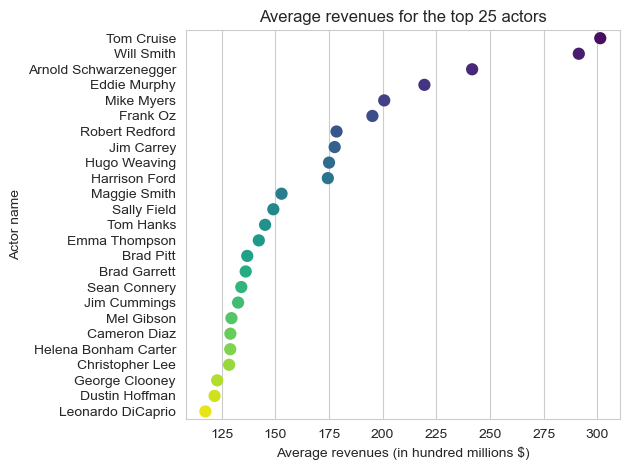

In [198]:
# Plot the geometric mean revenues for the top 25 actors
sns.pointplot(y='Actor_name', x='revenues_in_millions', data=top_actors.head(25), palette='viridis', errorbar=None)
plt.title('Average revenues for the top 25 actors')
plt.xlabel('Average revenues (in hundred millions $)')
plt.ylabel('Actor name')
plt.tight_layout()
plt.show()

In [199]:

# Create a scatter plot which is equivalent to Seaborn's pointplot
fig = px.scatter(top_actors.head(25), y='Actor_name', x='revenues_in_millions', 
                 color='Actor_name',  # Use a distinct color for each actor
                 title='Average revenues for the top 25 actors',
                 labels={'revenues_in_millions': 'Average revenues (in hundred millions $)',
                         'Actor_name': 'Actor name'},
                 height=800  # Adjust height to accommodate all actor names
                )

# Update the layout for a cleaner look
fig.update_layout(showlegend=False)  # Hide the legend if it's not needed
fig.update_traces(marker=dict(size=10))  # Adjust marker size as needed
fig.update_yaxes(categoryorder='total ascending')  # Sort the y-axis based on the values if needed

# Center the title and set the plot to allow for vertical scrolling
fig.update_layout(
    title_text='Average revenues for the top 25 actors',
    title_x=0.5,  # Center the title
    yaxis_fixedrange=False  # Allows for vertical scrolling on the y-axis
)

# The next line would be used to save the figure as an HTML file
# fig.write_html('path_to_file.html')

# Show the figure in the output (this line can be omitted if using in a script)
fig.show()

fig.write_html("assets/plots/actors_revenue.html")

Zokomo also says: " With geometric mean for actors, I am favoring those with consistent success over the ones who only participated in a few hits. A clear demonstration is that selecting the top actors with arithmetic mean results in many actors from harry potter or other sagas. This is because there are many film in these sagas with high revenues, which is boosting the actors mean revenues despite them not having much successful movies. "

# Release months

In [200]:
path = "csv_for_story/months_df.csv"
months_df = pd.read_csv(path)

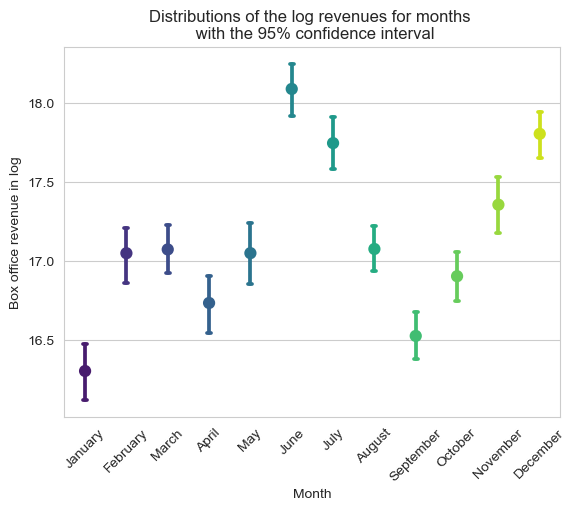

In [201]:
# boxplot of the revenues for each month
ax = sns.pointplot(x='Month', y='log_revenues', data=months_df, palette='viridis', capsize=0.1)
plt.title("Distributions of the log revenues for months \n with the 95% confidence interval")
plt.ylabel("Box office revenue in log")
plt.xlabel("Month")
# Customize x-axis labels
custom_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November", "December"]
ax.set_xticklabels(custom_labels, rotation=45)
plt.show()

In [202]:
from scipy import stats
import pandas as pd
import plotly.graph_objects as go

# Load the DataFrame
path = "csv_for_story/months_df.csv"
months_df = pd.read_csv(path)

# Group by 'Month' and calculate mean and standard error of the mean (SEM)
monthly_stats = months_df.groupby('Month')['log_revenues'].agg(['mean', 'count', 'std']).reset_index()

# Calculate the 95% CI using the t-distribution
confidence_level = 0.95
monthly_stats['ci_95'] = monthly_stats.apply(
    lambda row: stats.t.ppf((1 + confidence_level) / 2, row['count'] - 1) * (row['std'] / (row['count'] ** 0.5)), axis=1)

# Create a point plot using Plotly Graph Objects
fig = go.Figure()

# Add the mean revenue as a scatter plot
fig.add_trace(go.Scatter(
    x=monthly_stats['Month'],
    y=monthly_stats['mean'],
    mode='markers+lines',
    error_y=dict(
        type='data', # value of error bar given in data coordinates
        array=monthly_stats['ci_95'],
        visible=True
    ),
    name='Mean Log Revenue',
    line=dict(color='red'),  # Set the line color to red
    marker=dict(color='red')  # Set the marker color to red
))



# Customize the x-axis labels to show month names
custom_labels = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Update the x-axis with the custom labels and rotate them for better visibility
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=custom_labels,
    ),
    xaxis_title="Month",
    yaxis_title="Box office revenue in log",
    title="Distributions of the log revenues for months with the 95% confidence interval",
    title_x=0.5
)

# Save the figure as an HTML file
fig.write_html("assets/plots/months_revenue.html")

# This code ends here, the plot can be viewed by opening the saved HTML file

fig.show()


Our bear is stunned by the results he got. He observes that the best month to launch a movie is June, with a significant difference (no overlapping CIs), followed by December and July. He assumes that this aligns with the months when students typically have vacations, which might explain the results.

# Women percentage

Zokomo is now interested in the proportion of men and women actors in movies. He decides to analyze whether there is a particular proportion that generates higher box office revenues. To this extend, he is studying the percentage of actresses in movies and how they relate to the box office revenues.

In [203]:
path = "csv_for_story/gender_df.csv"
gender_df = pd.read_csv(path)

For that, our scientist is trying to perform an equal frequency discretization of the percentage of women, dividing percentages into 8 groups where there is an equal number of movies in each group. He thinks aht by doing it this way, then instead of feeding the final formula with an actual percentage of women, he will only use categorical variables.

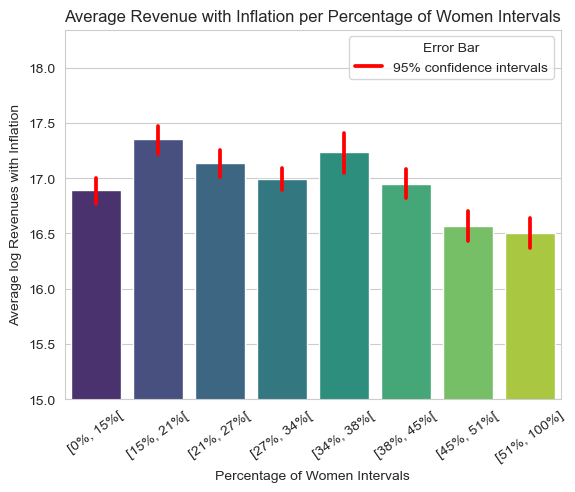

In [204]:
# Boxplot
ax = sns.barplot(x=gender_df['group'], y=gender_df['log_revenues'],palette='viridis', errcolor='red')

# Customize x-axis labels
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[","[45%, 51%[", "[51%, 100%]"]

ax.set_xticklabels(custom_labels, rotation=35)

plt.ylim(15, None)
plt.xlabel('Percentage of Women Intervals')
plt.ylabel('Average log Revenues with Inflation')
plt.title('Average Revenue with Inflation per Percentage of Women Intervals')

# Add legend
plt.legend(title='Error Bar', labels=['95% confidence intervals'])

plt.show()

From the plot, Zokomo notices that movies with women percentages between 15% and 21% result in significantly higher box office revenues, followed by movies that have women percentages between 34% and 38%. While movies with 45% to 100% have significantly lower mean box office revenues, and their confidence intervals don't intersect with other intervals.

In [205]:
import plotly.express as px
import pandas as pd
from scipy.stats import t

grouped_data = gender_df.groupby('group')['log_revenues'].agg(mean='mean', std='std', n='count').reset_index()
display(grouped_data)
# Calculate the 95% confidence interval
critical_value = t.ppf(0.975, grouped_data['n'] - 1)  # Two-tailed t-test for 95% CI
grouped_data['ci_95'] = critical_value * (grouped_data['std'] / grouped_data['n'] ** 0.5)

# Create the interactive bar plot
fig = px.bar(
    grouped_data, 
    x='group', 
    y='mean',
    error_y='ci_95',
    labels={'mean': 'Average Log Revenues with Inflation', 'group': 'Percentage of Women Intervals'},
    title='Average Revenue with Inflation per Percentage of Women Intervals',
    color='group',  # Color the bars by group
    color_continuous_scale='Viridis'  # Use the Viridis color scale
)

# Set the y-axis range if needed
fig.update_yaxes(range=[15, None])

# Customize the x-axis labels based on the given intervals
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[", "[45%, 51%[", "[51%, 100%]"]
fig.update_xaxes(tickvals=grouped_data['group'], ticktext=custom_labels)

# Hide the color scale if it's not desired
fig.update_layout(showlegend=False,title_x=0.5)


# Save the figure as an HTML file
fig.write_html("assets/plots/women_revenue.html")

# The fig.show() command is used to display the plot in an interactive Python environment such as Jupyter Notebook
fig.show()

,group,mean,std,n
0,0,16.889718,2.183399,1177
1,1,17.352263,2.012353,894
2,2,17.135323,2.024248,1034
3,3,16.991490,2.092149,1569
4,4,17.233683,2.002490,491
5,5,16.949693,2.237586,1044
6,6,16.568074,2.117766,958
7,7,16.505155,2.101054,978


In [206]:
import plotly.graph_objects as go
import pandas as pd


grouped_data = gender_df.groupby('group')['log_revenues'].agg(mean='mean', std='std', n='count').reset_index()
# Calculate the 95% confidence interval
critical_value = t.ppf(0.975, grouped_data['n'] - 1)  # Two-tailed t-test for 95% CI
grouped_data['ci_95'] = critical_value * (grouped_data['std'] / grouped_data['n'] ** 0.5)



# Create the bar chart with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['group'],
    y=grouped_data['mean'],
    error_y=dict(
        type='data',
        array=grouped_data['ci_95'],
        color='black',
        
        
    ),
      marker_color="red"  # Set the bar color (or use any other color or color scale)
))

# Customize the layout
fig.update_layout(
    title_text='Average Revenue with Inflation per Percentage of Women Intervals',
    xaxis_title='Percentage of Women Intervals',
    yaxis_title='Average Log Revenues with Inflation',
    yaxis=dict(range=[15, max(grouped_data['mean'] +0.2+ grouped_data['ci_95'])]),
    showlegend=False
)

# Customize the x-axis labels based on the given intervals
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[", "[45%, 51%[", "[51%, 100%]"]
fig.update_xaxes(tickvals=grouped_data['group'], ticktext=custom_labels)

# Hide the color scale if it's not desired
fig.update_layout(showlegend=False, title_x=0.5)


# Save the figure as an HTML file
fig.write_html("assets/plots/women_revenue.html")

# The fig.show() command is used to display the plot in an interactive Python environment such as Jupyter Notebook
fig.show()


In [207]:
path = "csv_for_story/countries_df_grouped_jerry.csv"
movie_countries_df_grouped = pd.read_csv(path)

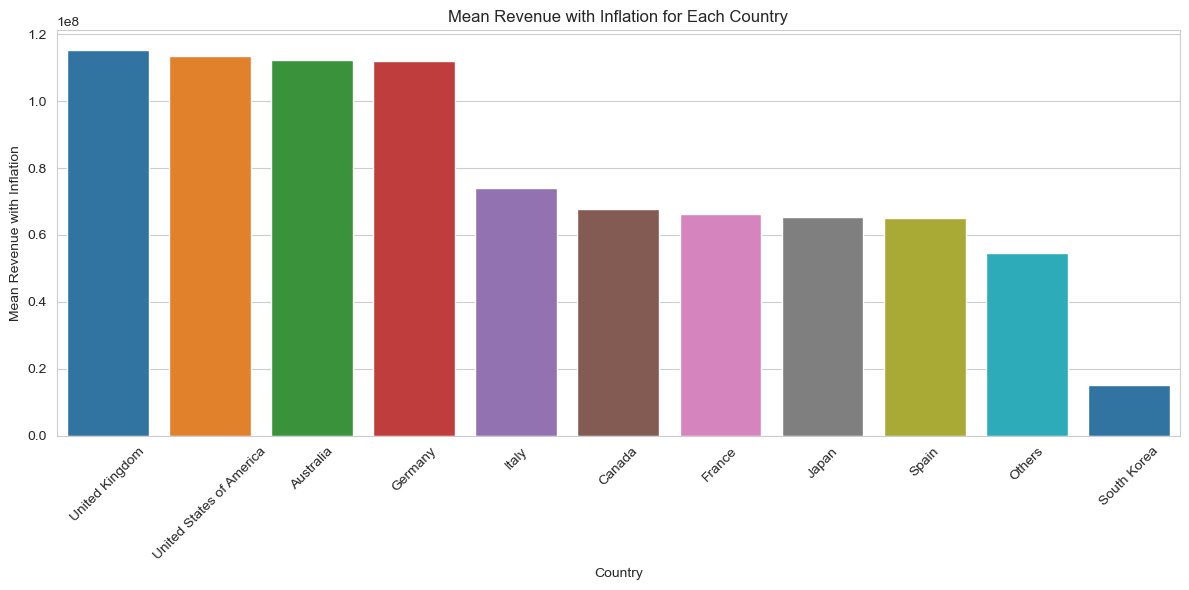

In [208]:
# Set a threshold count for the number of movies in a country
threshold = 80

# Select countries with a count greater than the threshold
top_movie_countries_df = movie_countries_df_grouped[movie_countries_df_grouped["count"] > threshold]

# Select countries with a count less than or equal to the threshold
other_movie_country = movie_countries_df_grouped[movie_countries_df_grouped["count"] <= threshold]

# Calculate the average revenue and log revenue of countries not in the list
others_revenue_inflation = (np.sum(other_movie_country['Revenue with inflation'] * other_movie_country['count'])) / other_movie_country['count'].sum()
others_revenue_log = (np.sum(other_movie_country['log_revenues'] * other_movie_country['count'])) / other_movie_country['count'].sum()

# Calculate the counts of countries not in the list
others_count = other_movie_country['count'].sum()

# Create a new row for 'Others' with the calculated average revenues
others_row = pd.DataFrame({
    'Country': ['Others'], 
    'count': [others_count], 
    'Revenue with inflation': [others_revenue_inflation],
    'log_revenues': [others_revenue_log]
})

# Concatenate the new row to the existing DataFrame
movie_countries_categories = pd.concat([top_movie_countries_df, others_row], ignore_index=True)

# Sort the DataFrame by 'Revenue with inflation' in descending order
movie_countries_categories_sorted = movie_countries_categories.sort_values('Revenue with inflation', ascending=False)

# Set up a multi-plot grid for two plots
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

# Use different colors for each plot
colors = plt.cm.tab10.colors

# Create a bar plot for 'Revenue with inflation'
sns.barplot(x='Country', y='Revenue with inflation', data=movie_countries_categories_sorted, palette=colors, ax=ax1)
ax1.set_title('Mean Revenue with Inflation for Each Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Mean Revenue with Inflation')
ax1.tick_params(axis='x', rotation=45)

# Sort the DataFrame by 'log_revenues' in descending order
#movie_countries_categories_sorted = movie_countries_categories.sort_values('log_revenues', ascending=False)

# Create a bar plot for 'log_revenues'
'''sns.barplot(x='Country', y='log_revenues', data=movie_countries_categories_sorted, palette=colors, ax=ax2)
ax2.set_title('Mean Log Revenues for Each Country')
ax2.set_xlabel('Country')
ax2.set_ylabel('Mean Log Revenues')
ax2.tick_params(axis='x', rotation=45)'''

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()

While dealing with the countries feature, Zokomo notices that the mean revenue per country, depicted in the bar chart he created, shows substantial variations across different countries. The United States of America, United Kingdom, Australia and Germany demonstrate particularly high mean revenues, indicating a strong performance for films from these countries. Conversely, countries like Italy, Canada, France, Japan and Spain show relatively lower mean revenues, though they still contribute significantly to the global film industry. In contrast, South Korea's mean revenue is on the lowest side.

In [209]:
import plotly.express as px

# Assuming movie_countries_categories_sorted is your DataFrame
fig = px.bar(movie_countries_categories_sorted, x='Country', y='Revenue with inflation', title='Mean Revenue with Inflation for Each Country', color_discrete_sequence=['red'] * len(movie_countries_categories_sorted))

# Save the interactive plot to an HTML file
fig.write_html('assets/plots/countries_bar_plot.html')

# Display the interactive plot in the Jupyter notebook
fig.show()

In [210]:
# Load the data
path = "csv_for_story/countries_df_onehot_jerry.csv"
movie_countries_df = pd.read_csv(path)

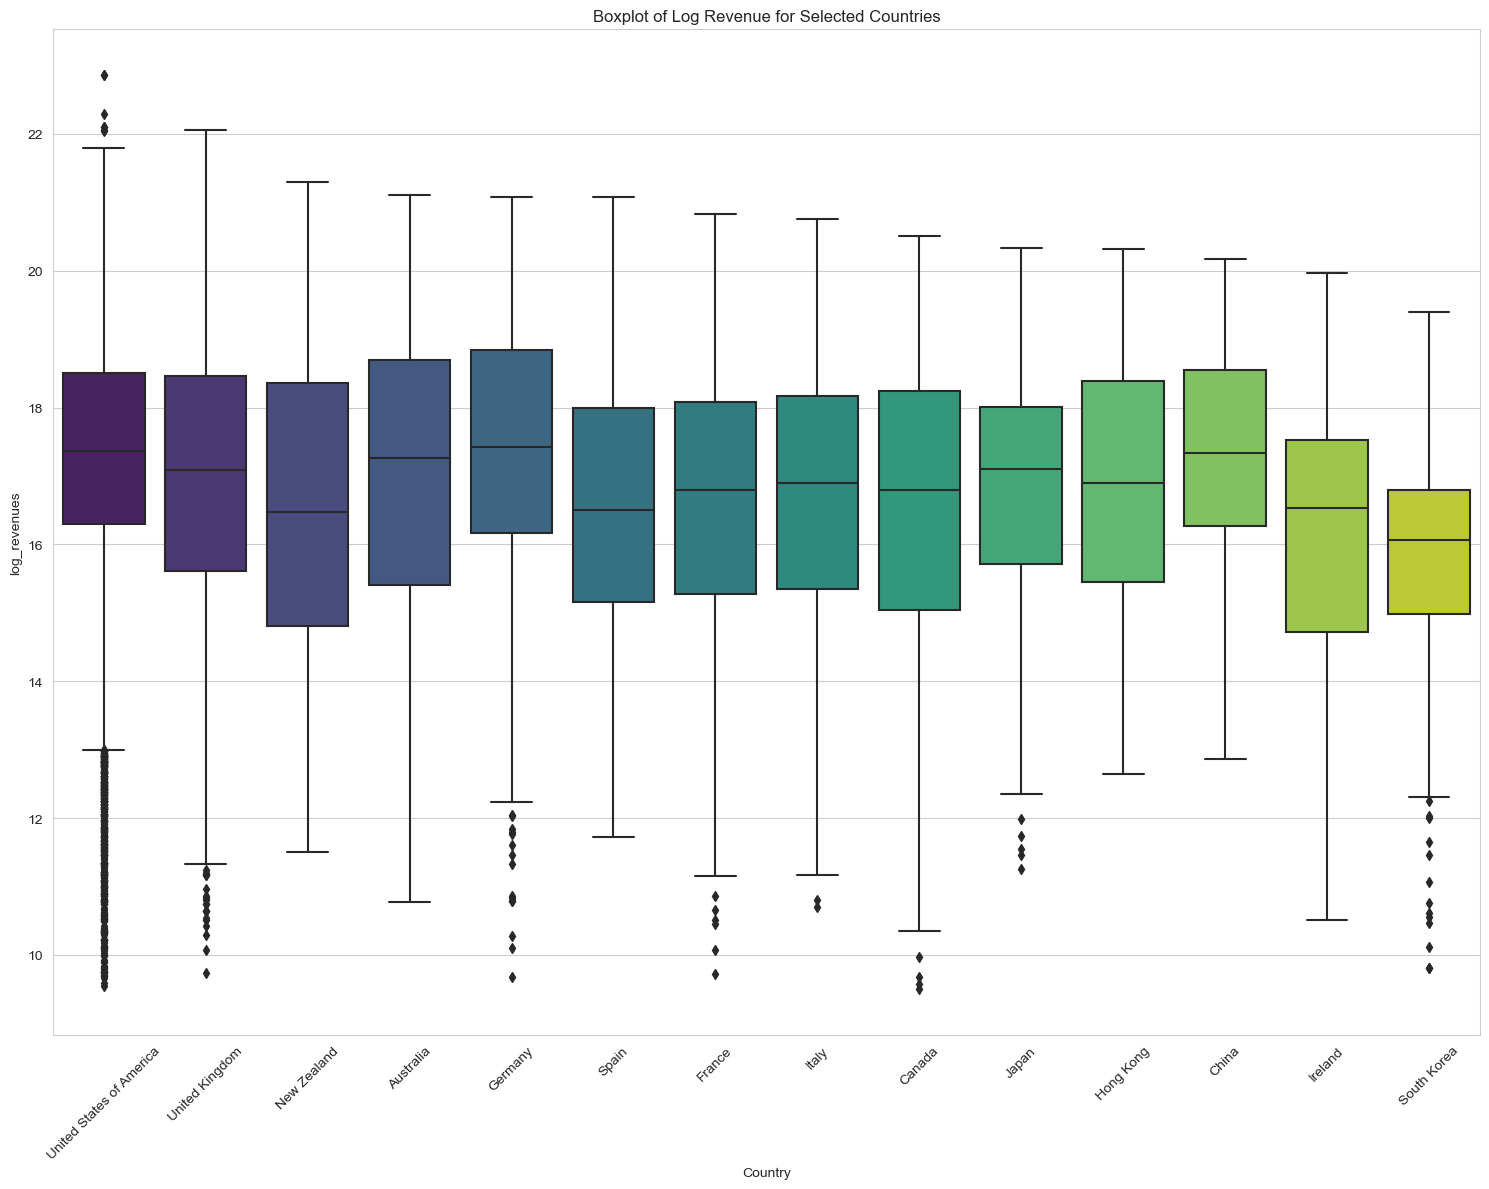

In [211]:
# Convert the string representation of the countries list into an actual list
movie_countries_df['Countries_List'] = movie_countries_df['Movie Countries'].apply(lambda x: ast.literal_eval(x))

# Define the selected countries
selected_countries = ['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 
                      'South Korea', 'Japan', 'Australia', 'Italy', 'Spain', 'Hong Kong', 'New Zealand', 
                      'Ireland', 'China']

# Create one-hot encoded columns for each selected country
for country in selected_countries:
    movie_countries_df[country] = movie_countries_df['Countries_List'].apply(lambda x: 1 if country in x else 0)

# Melt the DataFrame for selected countries
melted_df_log = movie_countries_df.melt(id_vars=['log_revenues'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_log = melted_df_log[melted_df_log['Is_Present'] == 1]

melted_df_rev = movie_countries_df.melt(id_vars=['Revenue with inflation'], value_vars=selected_countries, var_name='Country', value_name='Is_Present')
filtered_df_rev = melted_df_rev[melted_df_rev['Is_Present'] == 1]

# Sort the DataFrame in descending order of log_revenues
filtered_df_log = filtered_df_log.sort_values('log_revenues', ascending=False)
filtered_df_rev = filtered_df_rev.sort_values('Revenue with inflation', ascending=False)

# Set up a multi-plot grid
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns
fig, axes = plt.subplots(1, 1, figsize=(15, 12))

# Plot the mean log revenue with error bars and 95% confidence interval
'''sns.barplot(x='Country', y='log_revenues', data=filtered_df_log, ci=95, capsize=.2, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Mean Log Revenue for Selected Countries')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(15, 18)  # Zoom in y-axis'''

# Plot the boxplot for log revenue
sns.boxplot(x='Country', y='log_revenues', data=filtered_df_log, palette='viridis', ax=axes)
axes.set_title('Boxplot of Log Revenue for Selected Countries')
axes.tick_params(axis='x', rotation=45)

# Plot the mean revenue with inflation with error bars and 95% confidence interval
'''sns.barplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, ci=95, capsize=.2, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Mean Revenue with Inflation for Selected Countries')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the boxplot for revenue with inflation
sns.boxplot(x='Country', y='Revenue with inflation', data=filtered_df_rev, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Revenue with Inflation for Selected Countries')
axes[1, 1].tick_params(axis='x', rotation=45)'''

plt.tight_layout()
plt.show()

Zokomo employs a box plot to illustrate the distribution of logarithmic movie revenues in countries that feature at least 50 movies in their dataset. The median log revenue remains relatively consistent across countries, with a few exceptions displaying higher or lower median revenues. Notably, countries such as the United States of America exhibit a broader range of log revenues, indicating substantial variability in their movie earnings.

While many countries display numerous outliers on the lower end of the revenue spectrum, only the United States of America stands out with outliers on the higher end. This observation suggests that the USA has movies with revenues significantly exceeding the typical range, potentially attributable to the fact that a substantial proportion of movies are produced there.

Zokomo's assessment suggests that choosing to produce a movie in the USA is an attractive option for producers who are willing to take some risks. Despite the inherent risk of falling below the average American movie revenue, the presence of numerous low outliers indicates the potential for below-average earnings. However, the USA stands out as the only country with high outliers, implying the possibility of achieving a more predictable, substantial revenue and even experiencing remarkable financial success. While this decision carries its share of risk, it may ultimately prove to be worthwhile.

In [212]:
import plotly.express as px
import pandas as pd

# Now, create the Plotly interactive plot for log_revenues
fig_log = px.box(filtered_df_log, x='Country', y='log_revenues', title='Boxplot of Log Revenue for Selected Countries', color='Country')

# Save the interactive plot to an HTML file
fig_log.write_html('assets/plots/countries_box_plot.html')

# The interactive plots are now saved as 'interactive_log_revenues_plot.html' and 'interactive_revenue_with_inflation_plot.html' respectively.
fig_log.show()

In [213]:
# Load the data
path = "csv_for_story/languages_df_grouped_jerry.csv"
movie_languages_df_grouped = pd.read_csv(path)

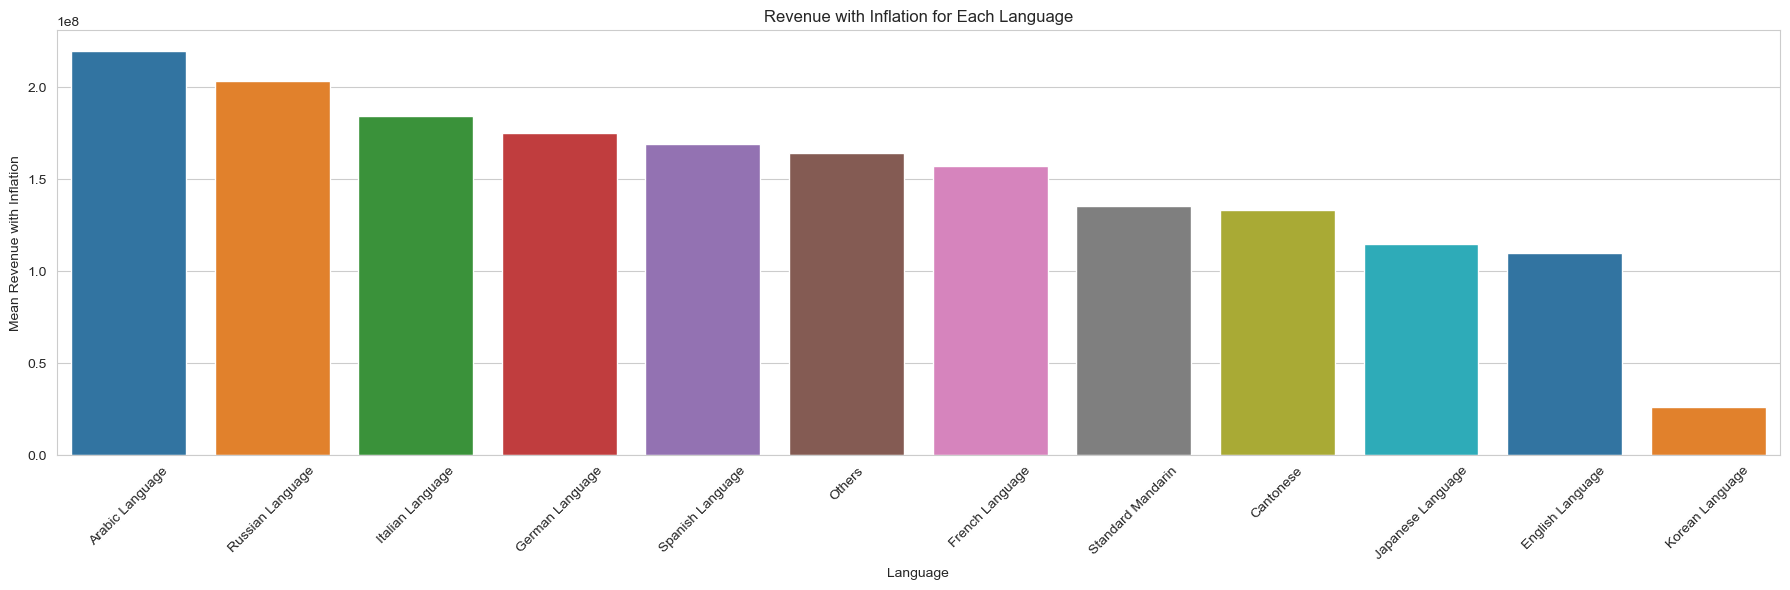

In [214]:
# Set a threshold count for the number of movies in a language
threshold = 50

# Select languages with a count greater than the threshold
top_movie_languages_df = movie_languages_df_grouped[movie_languages_df_grouped["count"] > threshold]

# Select languages with a count less than or equal to the threshold
other_movie_language = movie_languages_df_grouped[movie_languages_df_grouped["count"] <= threshold]

# Calculate the average revenue of languages not in the list
others_revenue_mean = (np.sum(other_movie_language['Revenue with inflation'] * other_movie_language['count'])) / other_movie_language['count'].sum()
others_log_revenue_mean = (np.sum(other_movie_language['log_revenues'] * other_movie_language['count'])) / other_movie_language['count'].sum()

# Calculate the counts of languages not in the list
others_count = other_movie_language['count'].sum()

# Create a new row for 'Others' with the calculated average revenue
others_row = pd.DataFrame({
    'Language': ['Others'], 
    'count': [others_count], 
    'Revenue with inflation': [others_revenue_mean],
    'log_revenues': [others_log_revenue_mean]
})

# Concatenate the new row to the existing DataFrame
movie_languages_categories = pd.concat([top_movie_languages_df, others_row], ignore_index=True)

# Use different colors for each genre
colors = plt.cm.tab10.colors

# Set up a multi-plot grid for two plots
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 6))

# Sort the DataFrame by 'Revenue with inflation' in descending order for the barplot
movie_languages_categories_sorted = movie_languages_categories.sort_values('Revenue with inflation', ascending=False)

# Create a bar plot for 'Revenue with inflation'
sns.barplot(x='Language', y='Revenue with inflation', data=movie_languages_categories_sorted, palette=colors, ax=ax1)
ax1.set_title('Revenue with Inflation for Each Language')
ax1.set_xlabel('Language')
ax1.set_ylabel('Mean Revenue with Inflation')
ax1.tick_params(axis='x', rotation=45)

# Sort the DataFrame by 'log_revenues' in descending order for the barplot
movie_languages_categories_sorted = movie_languages_categories.sort_values('log_revenues', ascending=False)

# Create a bar plot for 'log_revenues'
'''sns.barplot(x='Language', y='log_revenues', data=movie_languages_categories_sorted, palette=colors, ax=ax2)
ax2.set_title('Mean Log Revenue for Each Language')
ax2.set_xlabel('Language')
ax2.set_ylabel('Mean Log Revenue')
ax2.tick_params(axis='x', rotation=45)'''

# Ensure everything fits well in the plot area
plt.tight_layout()

# Show the plot
plt.show()

Zokomo generates a bar chart that illustrates the average movie revenues adjusted for inflation across the most frequently used languages in his dataset. The chart reveals that languages such as Arabic and Russian tend to have higher average revenues. Surprisingly, the categories of English and Korean, on the other hand, exhibit lower average revenues, which is somewhat unexpected.

To validate his findings, Zokomo plans to create a plot that displays the languages alongside the logarithmic movie revenues for movies produced in those languages. This additional analysis will provide a more comprehensive picture of revenue patterns across different languages in his dataset.

In [215]:
import plotly.express as px
import ast
import pandas as pd

# Now, create the Plotly interactive plot for log_revenues
fig_log = px.bar(movie_languages_categories_sorted, x='Language', y='Revenue with inflation', title='Revenue with inflation for Selected Languages', color='Language')

# Save the interactive plot to an HTML file
fig_log.write_html('assets/plots/languages_bar_plot.html')

# The interactive plots are now saved as 'interactive_log_revenues_plot.html' and 'interactive_revenue_with_inflation_plot.html' respectively.
fig_log.show()

In [216]:
# Load the data
path = "csv_for_story/languages_df_onehot_jerry.csv"
movie_languages_df = pd.read_csv(path)

/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_89044/2045882444.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




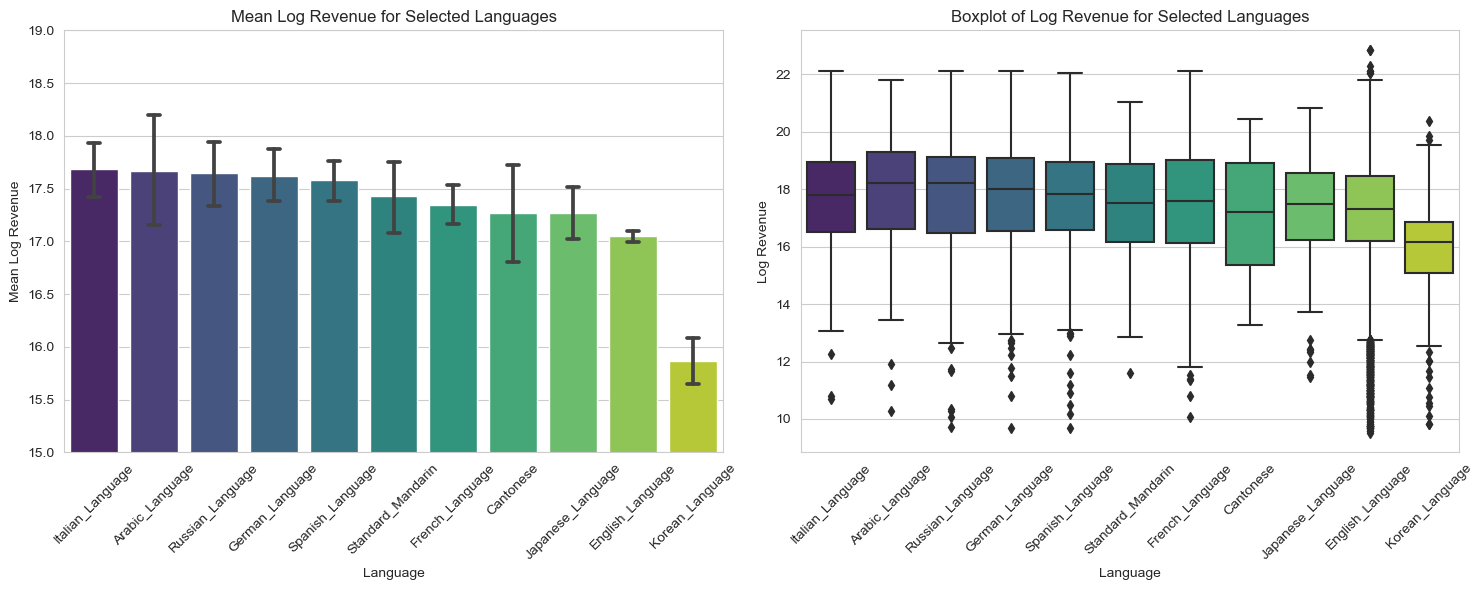

In [217]:
# Define the selected languages
selected_languages = ['Italian_Language', 'Arabic_Language', 'Russian_Language', 'German_Language', 
                      'Spanish_Language', 'Standard_Mandarin', 'French_Language', 'Cantonese', 
                      'Japanese_Language', 'English_Language', 'Korean_Language']

# Melt the DataFrame for selected languages
melted_df_log_revenues = movie_languages_df.melt(id_vars=['log_revenues'], value_vars=selected_languages, var_name='Language', value_name='Is_Present')
filtered_df_log_revenues = melted_df_log_revenues[melted_df_log_revenues['Is_Present'] == 1]

melted_df_revenue_inflation = movie_languages_df.melt(id_vars=['Revenue with inflation'], value_vars=selected_languages, var_name='Language', value_name='Is_Present')
filtered_df_revenue_inflation = melted_df_revenue_inflation[melted_df_revenue_inflation['Is_Present'] == 1]

# Sorting the data by mean revenue in descending order for visualization
sorted_df_log_revenues = filtered_df_log_revenues.groupby('Language')['log_revenues'].mean().sort_values(ascending=False).reset_index()
sorted_df_revenue_inflation = filtered_df_revenue_inflation.groupby('Language')['Revenue with inflation'].mean().sort_values(ascending=False).reset_index()

# Set up a multi-plot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean log revenue with error bars and 95% confidence interval
sns.barplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], ci=95, capsize=.2, palette='viridis', ax=axs[0])
axs[0].set_title('Mean Log Revenue for Selected Languages')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Mean Log Revenue')
axs[0].set_ylim(15, 19)  # Zooming in on the y-axis
axs[0].tick_params(axis='x', rotation=45)

# Plot the boxplot for log revenue
sns.boxplot(x='Language', y='log_revenues', data=filtered_df_log_revenues, order=sorted_df_log_revenues['Language'], palette='viridis', ax=axs[1])
axs[1].set_title('Boxplot of Log Revenue for Selected Languages')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Log Revenue')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Zokomo started by plotting a bar chart that shows the mean log revenue for each selected language with 95% confidence intervals. He finds that Italian has the highest average log revenue among the selected languages, but also a wide confidence interval, which indicates higher variability in revenue. In contrast, he realises that Korean has the lowest average log revenue among the selected languages and a narrow confidence interval, which indicates a consistent but lower revenue performance, which highlights more the weak relationship he found when dealing with South Korea as a country and high movies revenues. 

He also creates a box plot demonstrating the distribution of logarithmic movie revenues for selected languages. He notices that English and Korean languages show a greater range and many outliers. In particular, English displays a wide range, which is expected given the large number of English language films, including both high-revenue and lower-revenue films. However, languages such as Standard Mandarin and Cantonese show zero outliers, which implies a more consistent revenue performance across films in those languages.


In [218]:
ci_data = filtered_df_log_revenues.groupby('Language')['log_revenues'].agg(['mean', 'std', 'count']).reset_index()
ci_data['ci'] = 1.96 * (ci_data['std'] / ci_data['count'].pow(0.5))  # 95% confidence interval

# Plot the mean log revenue with confidence intervals using Plotly Express
fig_ci_language = px.bar(
    ci_data,
    x='Language',
    y='mean',
    title='Mean Log Revenue for Selected Languages with 95% CI',
    labels={'mean': 'Mean Log Revenue'},
    color='Language',
    error_y='ci',  # Add confidence intervals as error bars
)
fig_ci_language.update_xaxes(tickangle=45)
fig_ci_language.update_yaxes(range=[15, 19])  # Zooming in on the y-axis

# Save the interactive plot with confidence intervals as an HTML file
fig_ci_language.write_html("assets/plots/languages_bar.html")

# Show the interactive plot
fig_ci_language.show()

In [219]:
import plotly.express as px

# Plot the boxplot for log revenue using Plotly Express
fig_box_language = px.box(
    filtered_df_log_revenues,
    x='Language',
    y='log_revenues',
    title='Boxplot of Log Revenue for Selected Languages',
    color='Language'
)


# Save the interactive plot with confidence intervals as an HTML file
fig_box_language.write_html("assets/plots/languages_box.html")

# Show the interactive plot
fig_box_language.show()


In [220]:
fig = make_subplots()
# Add a trace for each plot (only one will be visible at a time)
for trace in fig_ci_language.data:
    fig.add_trace(trace)

for trace in fig_box_language.data:
    trace.visible = False
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_ci_language.data) +
                                       [False] * len(fig_box_language.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_ci_language.data) +
                                       [True] * len(fig_box_language.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Log revenue for selected langauges",
    title_x=0.5,  # Centers the title
    xaxis_title="Language",
    yaxis_title="Log revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_ci_language.data) + [False]*len(fig_box_language.data)}],
                label="Bar plot ",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_ci_language.data) + [True]*len(fig_box_language.data)}],
                label="Box plot",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/language_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/language_revenue.png', engine='kaleido')